<a href="https://colab.research.google.com/github/Singati2/AI_Science_Medicine/blob/main/Load_MedMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from torchvision.transforms.functional import normalize
import numpy as np
import matplotlib.pyplot as plt

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Select GPU if available

In [4]:
def scale_img_255(img):
    return ((img - img.min()) / (img.max() - img.min()) * 255).astype(np.uint8)     # Make sure it's uint8 and in the range [0, 255]

def imshow(img):
    img = img.cpu().numpy()    
    img = scale_img_255(img)
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

In [5]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)
def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=device)

In [6]:
# Dataset URLS
# https://zenodo.org/record/6496656/files/pathmnist.npz
# https://zenodo.org/record/6496656/files/bloodmnist.npz
# https://zenodo.org/record/6496656/files/chestmnist.npz
# https://zenodo.org/record/6496656/files/dermamnist.npz
# https://zenodo.org/record/6496656/files/breastmnist.npz
# https://zenodo.org/record/6496656/files/octmnist.npz
# https://zenodo.org/record/6496656/files/organamnist.npz
# https://zenodo.org/record/6496656/files/organcmnist.npz
# https://zenodo.org/record/6496656/files/organsmnist.npz
# https://zenodo.org/record/6496656/files/pathmnist.npz
# https://zenodo.org/record/6496656/files/pneumoniamnist.npz
# https://zenodo.org/record/6496656/files/tissuemnist.npz
# https://zenodo.org/record/6496656/files/vesselmnist3d.npz
# https://zenodo.org/record/6496656/files/synapsemnist3d.npz
# https://zenodo.org/record/6496656/files/adrenalmnist3d.npz
# https://zenodo.org/record/6496656/files/fracturemnist3d.npz
# https://zenodo.org/record/6496656/files/nodulemnist3d.npz
# https://zenodo.org/record/6496656/files/organmnist3d.npz

In [7]:
!wget https://zenodo.org/record/6496656/files/pathmnist.npz

--2023-06-12 20:14:10--  https://zenodo.org/record/6496656/files/pathmnist.npz
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205615438 (196M) [application/octet-stream]
Saving to: ‘pathmnist.npz’

pathmnist.npz       100%[===================>] 196.09M   517KB/s    in 6m 26s  

2023-06-12 20:20:37 (521 KB/s) - ‘pathmnist.npz’ saved [205615438/205615438]



In [8]:
data = np.load('pathmnist.npz')

In [9]:
print(data.files)

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [10]:
x = data['train_images']
y = data['train_labels']

x_test = data['test_images']
y_test = data['test_labels']

y = y[:,0]
y_test = y_test[:,0]

x = GPU_data(x)
y = GPU_data(y).to(torch.int64)

x_test = GPU_data(x_test)
y_test = GPU_data(y_test).to(torch.int64)

In [11]:
def scale_img(img):
    img_min = torch.min(img)
    img_max = torch.max(img)
    scaled_img = (img - img_min) / (img_max - img_min) * 1.0
    return scaled_img

In [12]:
x = scale_img(x)
x_test = scale_img(x_test)

In [13]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

def montage(images_tensor):
    b, c, h, w = images_tensor.shape # batch size, # of channels, height & weight of tensor

    if w == 3:
        images_tensor = np.transpose(images_tensor,(0,3,1,2))
        b, c, h, w = images_tensor.shape

    assert c == 1 or c == 3, "Number of channels must be either 1 (grayscale) or 3 (RGB)"
    
    montage_w = int(np.ceil(np.sqrt(b))) # ensures the montage can accommodate all images in the batch while maintaining a square shape
    montage_h = int(np.ceil(b / montage_w)) # ensures that the montage image has enough rows to accommodate all the images in the batch
    
    if c == 1:
        montage_image = np.zeros((montage_h * h, montage_w * w)) # create blank montage w the same number of channels as the input images (1, gray).
    else:
        montage_image = np.zeros((montage_h * h, montage_w * w, c)) # creates color montage
    
    for idx, img in enumerate(images_tensor): # correctly position each image in the montage grid based on its index
        i = idx // montage_w
        j = idx % montage_w
        if c == 1: # assigns each image in the tensor to the corresponding region in the montage based on its row and column indices
            montage_image[i * h:(i + 1) * h, j * w:(j + 1) * w] = img.squeeze(0)
        else:
            montage_image[i * h:(i + 1) * h, j * w:(j + 1) * w, :] = np.transpose(img, (1, 2, 0))
        
    return montage_image

In [14]:
x.shape

torch.Size([89996, 28, 28, 3])

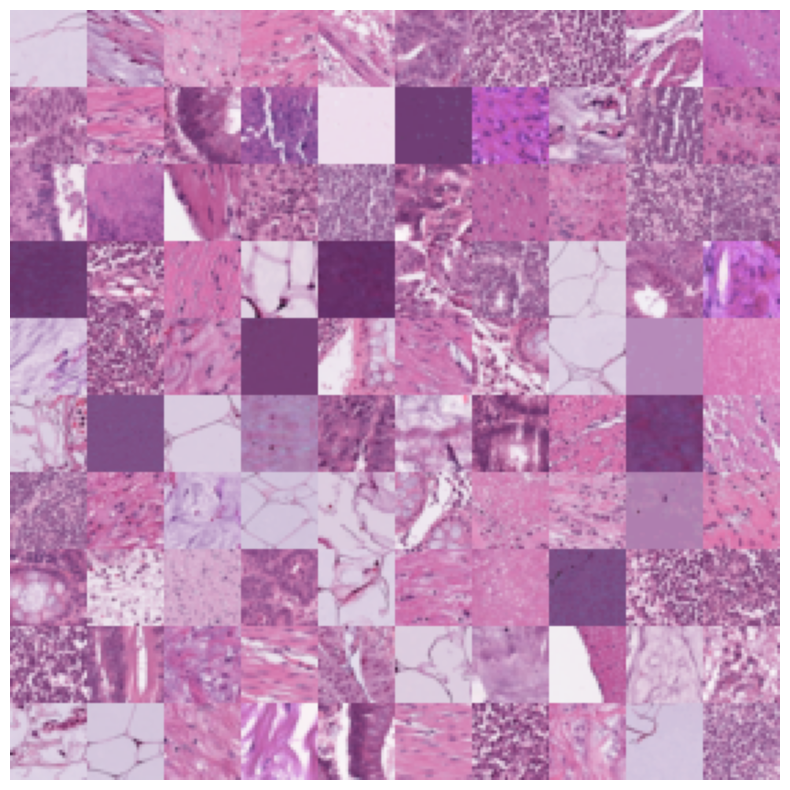

In [15]:
plot(montage(x[:100]))